# Scatter-plot of earthquakes in Southern California using Pandas

- ***Author(s): Mark Naylor***
- ***Student numbers(s): ___***
- ***Date: March 2019***

**DESCRIPTION:** This example uses web-scraping techniques to generate a unified Southern California earthquake catalogue stored as a Pandas dataframe. Then a scatter-plot is generated using a Pandas method.

## 1. Load required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [8, 8]

---

## 2. Load data from the Southern California Earthquake catalogue

This data is stored in separate tab delimited files on the web

Look one of the catalogues on this ftp site: http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/


### 2.1 Load a single year from the catalogue

First, let's work with a single year the we can upscale.

Select the url of one of the catalogues, enter it in the code below and run it:

   #YYY/MM/DD  HH:mm:SS.ss  ET GT   MAG  M     LAT      LON  DEPTH  Q  \
0  1932/01/01  23:52:07.87  eq  l  0.00  n  34.130 -117.993    6.0  D   
1  1932/01/02  16:42:43.68  eq  l  2.73  l  33.903 -117.645    6.0  C   
2  1932/01/03  17:58:10.01  eq  l  3.00  h  32.000 -116.000    6.0  D   
3  1932/01/04  21:30:00.96  eq  l  2.00  h  33.771 -117.494    6.0  C   
4  1932/01/05  02:37:27.96  eq  l  1.50  h  33.559 -118.442    6.0  C   

        EVID   NPH  NGRM  
0  3358386.0   7.0   0.0  
1  3358387.0  12.0   0.0  
2  3358388.0   7.0   0.0  
3  3358396.0  11.0   0.0  
4  3358398.0   8.0   0.0  
Shape of dataframe (425, 13)


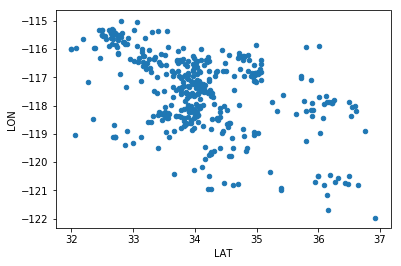

In [5]:
url = "http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/1932.catalog"
df = pd.read_csv(url , delim_whitespace=True, skiprows=9)

df.plot(kind="scatter", x="LAT", y="LON")

print(df.head())
print("Shape of dataframe",df.shape)

### 2.2 Iterate over all the years and create a unified catalogue

It would be a pain if we had to load each catalogue manually and append them together. So, let's iterate over them using Python instead!

- You can append Pandas DataFrames together using the `df1.append(df2)`. This appends `df1` and `df2` together - both need to be DataFrame objects. See the example below.

- In the `print` call below I have included the argument `end='\r'` which means the print statement will overwrite as each year is processed. (Only works in Python 3)

- This will have finished when we get to 2019, which will likely take a few minutes

In [6]:
df_full = pd.DataFrame()

for i in range(1932,2019):
    url = "http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/"+str(i)+".catalog"
    print("Processing year:"+str(i), end='\r')
    df_tmp = pd.read_csv(url , delim_whitespace=True, skiprows=9)
    df_full = df_full.append(df_tmp)

We can find how many events there are in the catalogue using the `shape` attribute: 

In [7]:
print("Shape of the earthquake catalogue",df_full.shape)

Shape of the earthquake catalogue (717753, 13)


So there are 13 columns and over 700,000 events

We can look at the first few entries using the head of the dataframe:

In [8]:
df_full.head()

#YYY/MM/DD  HH:mm:SS.ss  ET GT   MAG  M     LAT      LON  DEPTH  Q  \
0  1932/01/01  23:52:07.87  eq  l  0.00  n  34.130 -117.993    6.0  D   
1  1932/01/02  16:42:43.68  eq  l  2.73  l  33.903 -117.645    6.0  C   
2  1932/01/03  17:58:10.01  eq  l  3.00  h  32.000 -116.000    6.0  D   
3  1932/01/04  21:30:00.96  eq  l  2.00  h  33.771 -117.494    6.0  C   
4  1932/01/05  02:37:27.96  eq  l  1.50  h  33.559 -118.442    6.0  C   

        EVID   NPH  NGRM  
0  3358386.0   7.0   0.0  
1  3358387.0  12.0   0.0  
2  3358388.0   7.0   0.0  
3  3358396.0  11.0   0.0  
4  3358398.0   8.0   0.0

Finally, let's plot the catalogue as a scatter plot using the LAT and LON columns. Since there are a large number of events, we give them a size of 0.01 to make them more visible.

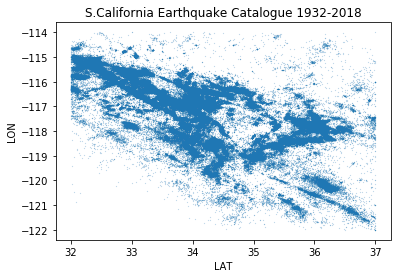

In [12]:
df_full.plot(kind="scatter", x="LAT", y="LON", s=0.01)
plt.title("S.California Earthquake Catalogue 1932-2018")
plt.savefig("SCalEqCatScatterPlot.png")